In [2]:
# 1. Importing the required libraries

!pip install pandas openpyxl
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings


In [3]:
# 2.Read the .csv file

data = pd.read_csv("/Users/elnazshahzeidi/Desktop/regression_data_final.csv",sep=';')
data.head()


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,13/10/2014,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,"47,5112","-122,257",1340,5650,221900
1,6414100192,09/12/2014,3,"2,25",2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,"47,721","-122,319",1690,7639,538000
2,5631500400,25/02/2015,2,1,770,10000,1,0,0,3,...,770,0,1933,0,98028,"47,7379","-122,233",2720,8062,180000
3,2487200875,09/12/2014,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,"47,5208","-122,393",1360,5000,604000
4,1954400510,18/02/2015,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,"47,6168","-122,045",1800,7503,510000


In [4]:
# 3.Change headers names

data.columns = data.columns.str.lower().str.replace(' ','_')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,13/10/2014,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,"47,5112","-122,257",1340,5650,221900
1,6414100192,09/12/2014,3,"2,25",2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,"47,721","-122,319",1690,7639,538000
2,5631500400,25/02/2015,2,1,770,10000,1,0,0,3,...,770,0,1933,0,98028,"47,7379","-122,233",2720,8062,180000
3,2487200875,09/12/2014,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,"47,5208","-122,393",1360,5000,604000
4,1954400510,18/02/2015,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,"47,6168","-122,045",1800,7503,510000


In [5]:
# 4.Data cleaning/checking and adjusting the types of data in each column

data.dtypes

id                int64
date             object
bedrooms          int64
bathrooms        object
sqft_living       int64
sqft_lot          int64
floors           object
waterfront        int64
view              int64
condition         int64
grade             int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
zipcode           int64
lat              object
long             object
sqft_living15     int64
sqft_lot15        int64
price             int64
dtype: object

In [6]:
# 4.2 Dealing with the Nans

data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
# 5. EDA - Exploratory Data Analysis

data1 = data.copy()

numerical= data1.select_dtypes('number')
categorical= data1.select_dtypes('object')

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


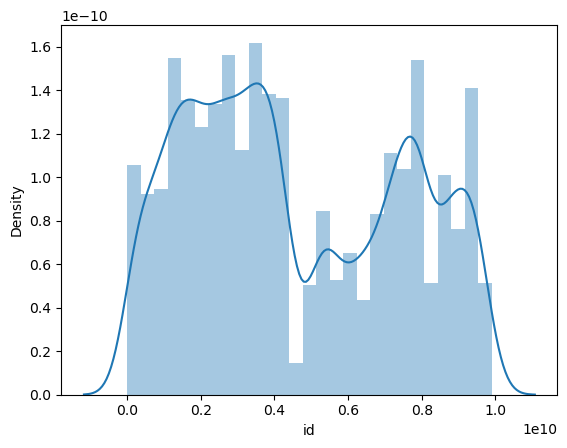

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


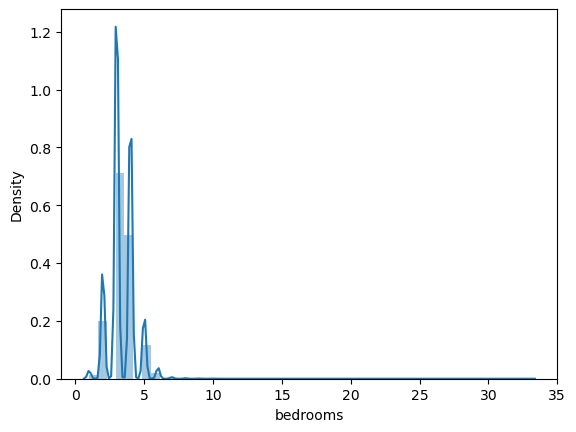

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


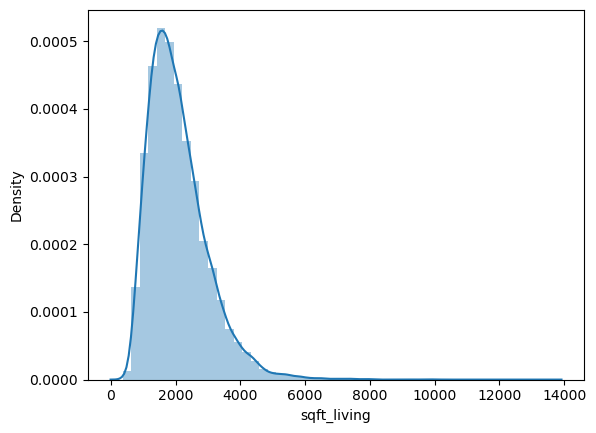

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


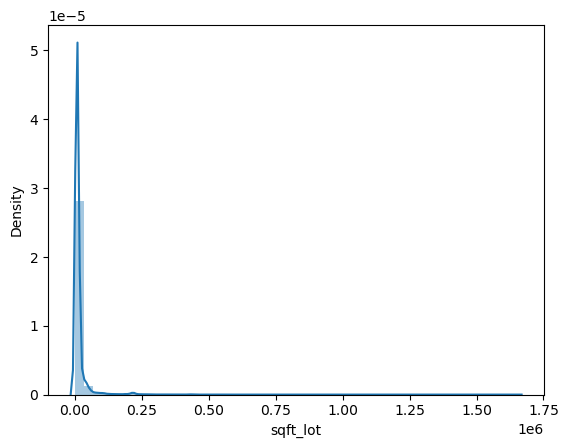

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


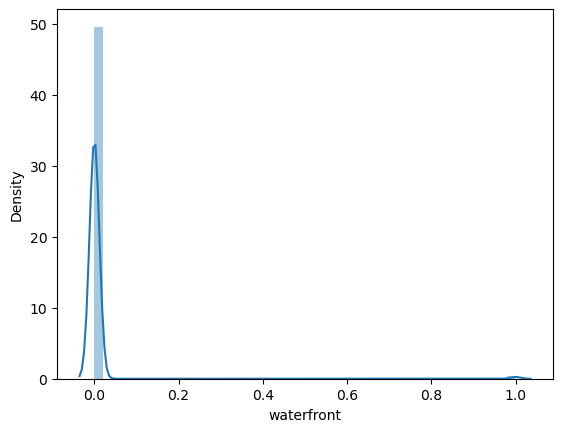

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


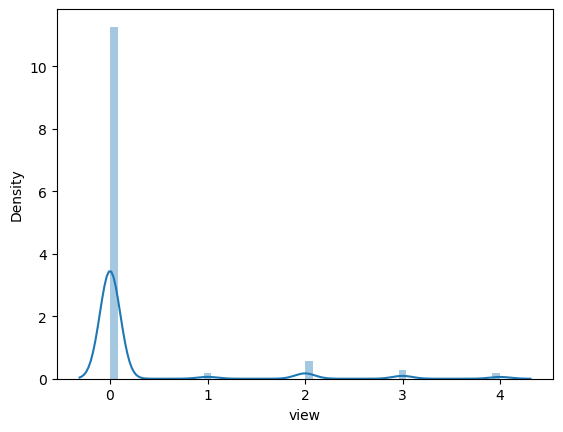

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


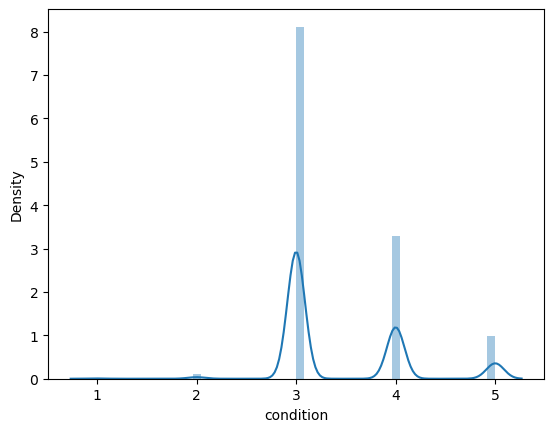

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


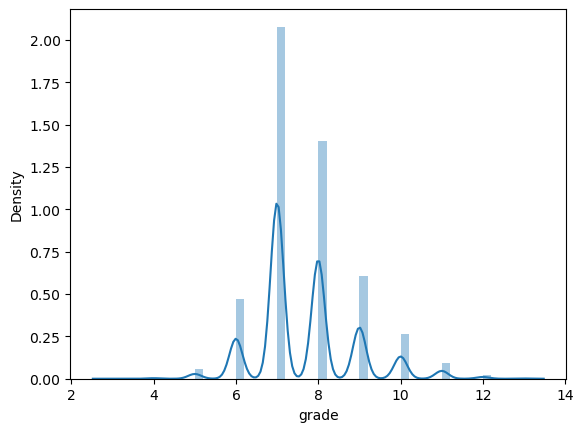

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


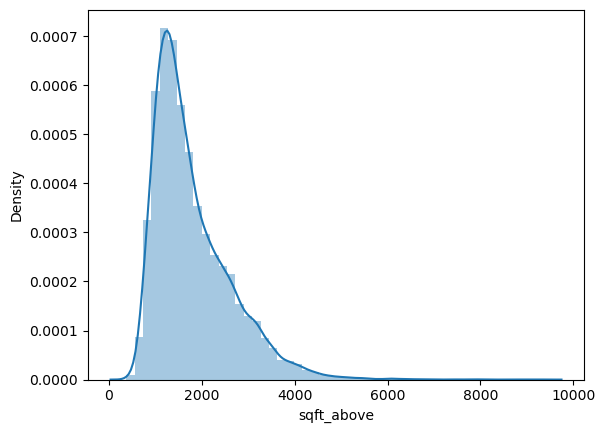

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


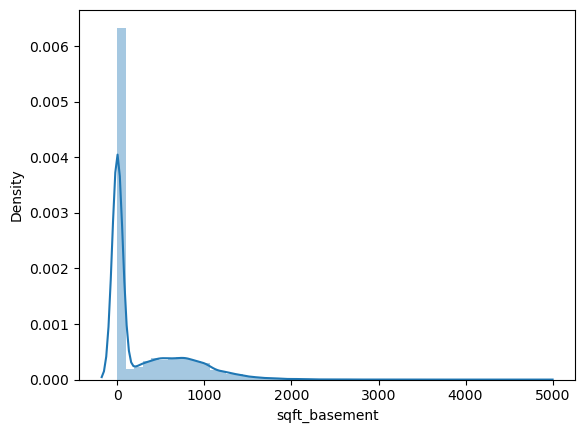

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


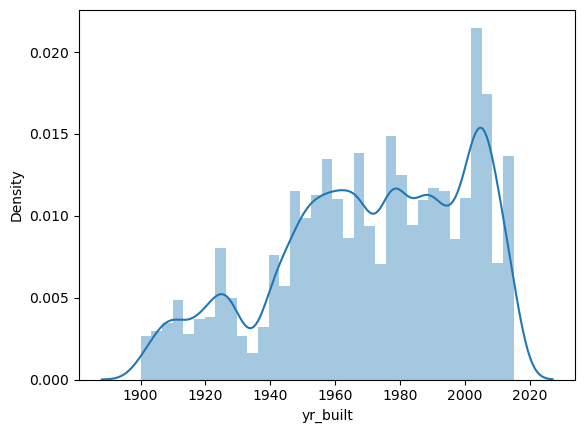

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


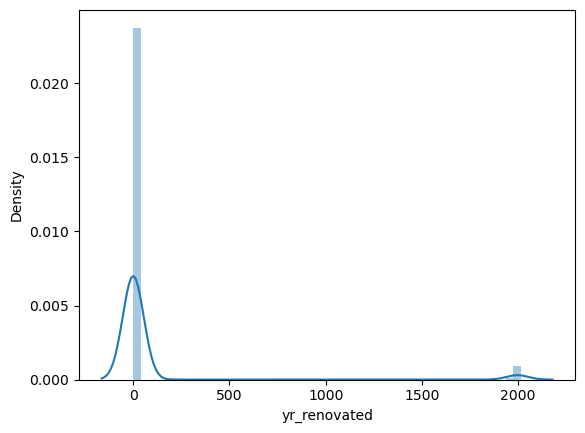

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


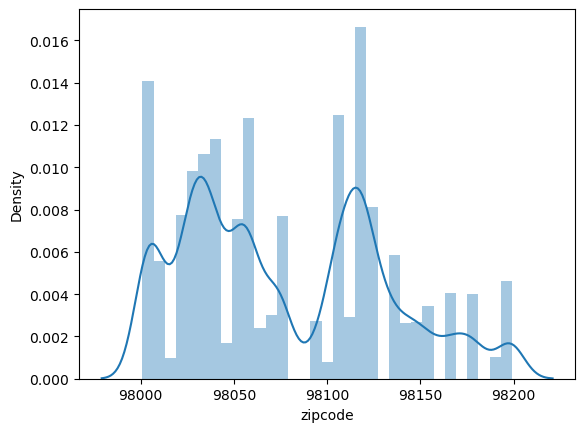

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


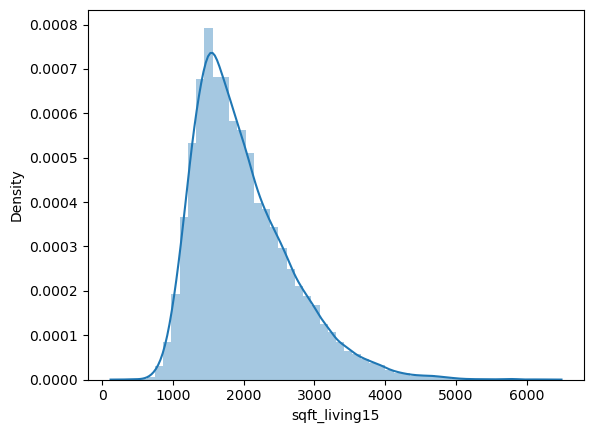

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


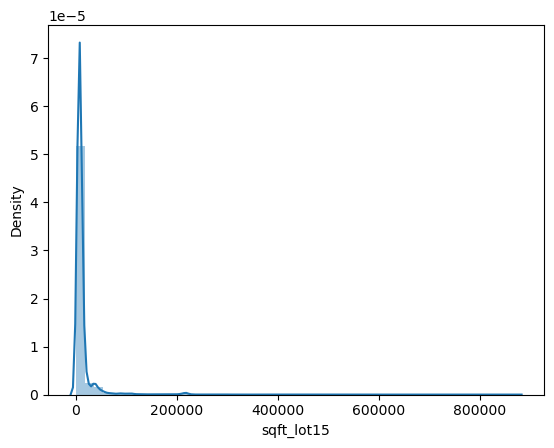

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_21612/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


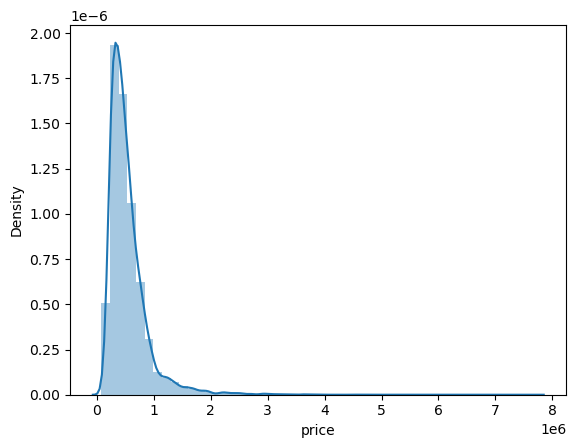

In [9]:
# 5.1 Checking the probability distributions

for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.show()
    
    

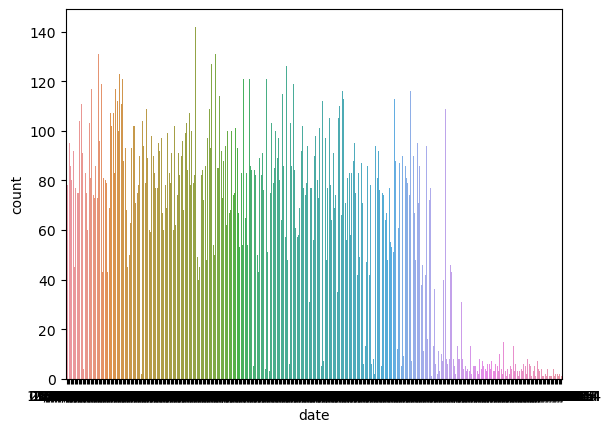

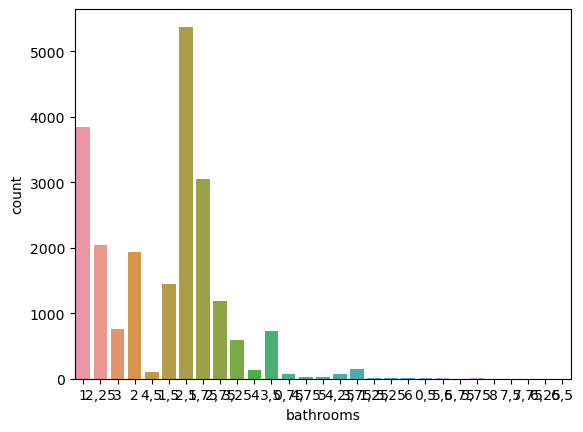

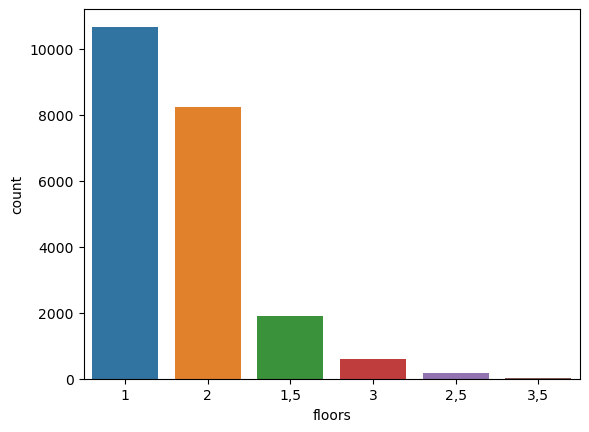

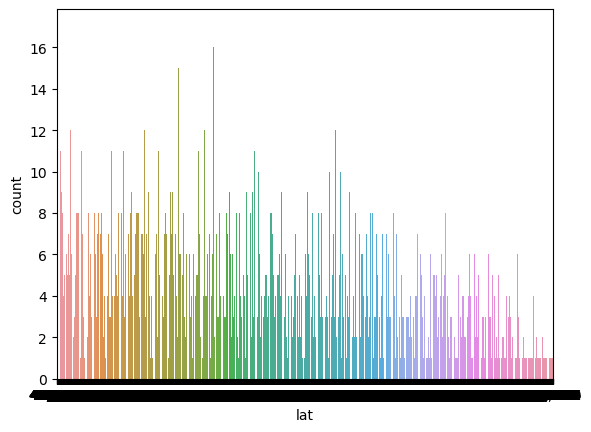

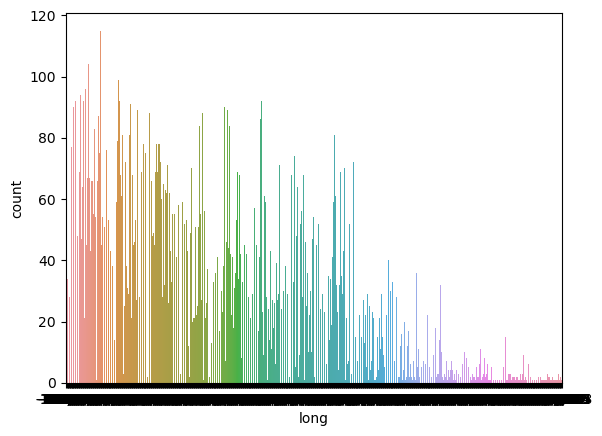

In [10]:
for col in categorical.columns:
    sns.countplot(x= categorical[col])
    plt.show()

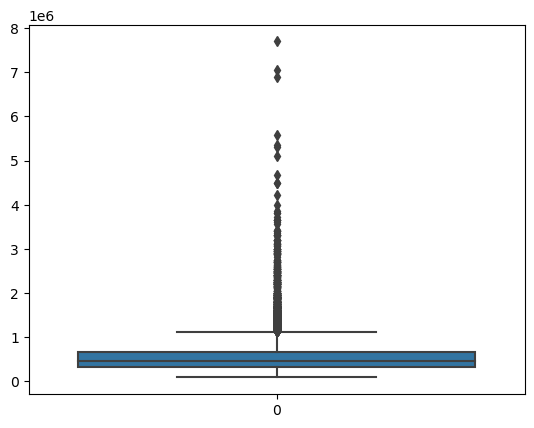

In [11]:
# 5.2 Dealing with outliers

sns.boxplot(data1['price'])
plt.show()


In [12]:
# To calculate the exact outliers range:
IQR = abs(np.quantile(data1["price"], .25) - np.quantile(data1["price"], .75)) * 1.5
lower_boundary = np.quantile(data1["price"], .25) - IQR
upper_boundary = np.quantile(data1["price"], .75) + IQR

# Outliers for this column are values smaller than lower_boundary or bigger than upper_boundary:
lower_boundary, upper_boundary

(-162500.0, 1129500.0)

In [14]:

data1[(data1['price'] > 1129500.0) | (data1['price'] < -162500.0)].sort_values("price")



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3101,6613000015,23/12/2014,4,3,3180,4649,2,0,0,4,...,2070,1110,1925,0,98105,"47,6583","-122,273",2720,5980,1130000
7674,9286000150,30/03/2015,6,4,5330,18116,2,0,0,3,...,3950,1380,2000,0,98006,"47,5503","-122,137",4590,16900,1130000
2444,7856640560,04/06/2014,5,"3,5",3880,13885,2,0,3,4,...,2540,1340,1979,0,98006,"47,5696","-122,156",3690,13885,1130000
13280,5015001215,23/04/2015,4,"3,5",3170,4000,2,0,0,3,...,2340,830,1999,0,98112,"47,6265","-122,298",1770,4000,1130000
1372,6117500320,08/07/2014,3,"2,25",2790,13791,1,0,3,3,...,2790,0,2006,0,98166,"47,4389","-122,351",2720,12600,1130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,13/04/2015,5,5,8000,23985,2,0,4,3,...,6720,1280,2009,0,98004,"47,6232","-122,22",4600,21750,5350000
4407,2470100110,04/08/2014,5,"5,75",9200,35069,2,0,0,3,...,6200,3000,2001,0,98039,"47,6289","-122,233",3560,24345,5570000
9245,9208900037,19/09/2014,6,"7,75",9890,31374,2,0,4,3,...,8860,1030,2001,0,98039,"47,6305","-122,24",4540,42730,6890000
3910,9808700762,11/06/2014,5,"4,5",10040,37325,2,1,2,3,...,7680,2360,1940,2001,98004,"47,65","-122,214",3930,25449,7060000


In [17]:
# 5.3 Checking the relationships between the columns

data2 = data1.copy()

In [18]:
# 5.3.1 Correlation between the features and the target

correlations_matrix = numerical.corr()


correlations_matrix["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
waterfront       0.266398
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

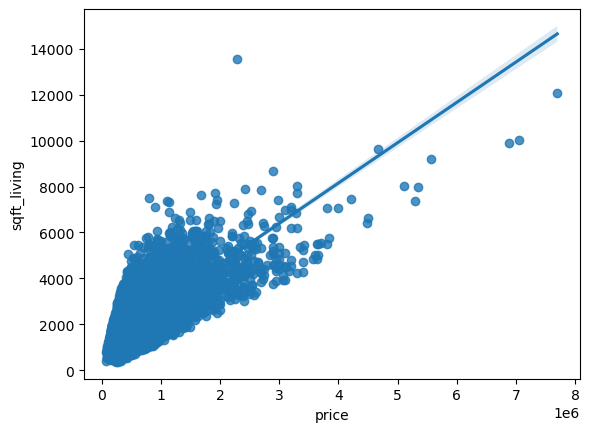

In [19]:
# The highest correlation is between sqft_living and our target(price). 
# As we can see in the plot, there is a strong possitive relationship between 'price' and 'sqft_living'.

sns.regplot(x = data2['price'],y = data2['sqft_living'])
plt.show()

<Axes: xlabel='floors', ylabel='price'>

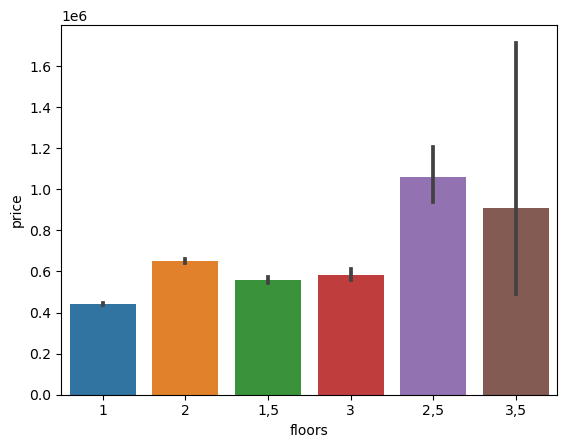

In [22]:
# Relationship between categorical features and target

sns.barplot(x=data2['floors'], y=data2['price'])



<Axes: xlabel='bathrooms', ylabel='price'>

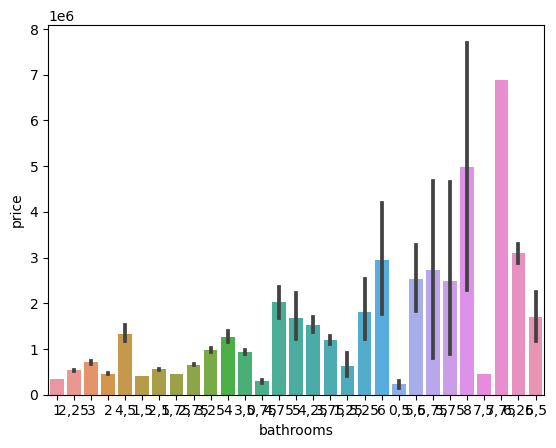

In [23]:
# Relationship between categorical features and target

sns.barplot(x=data2['bathrooms'], y=data2['price'])



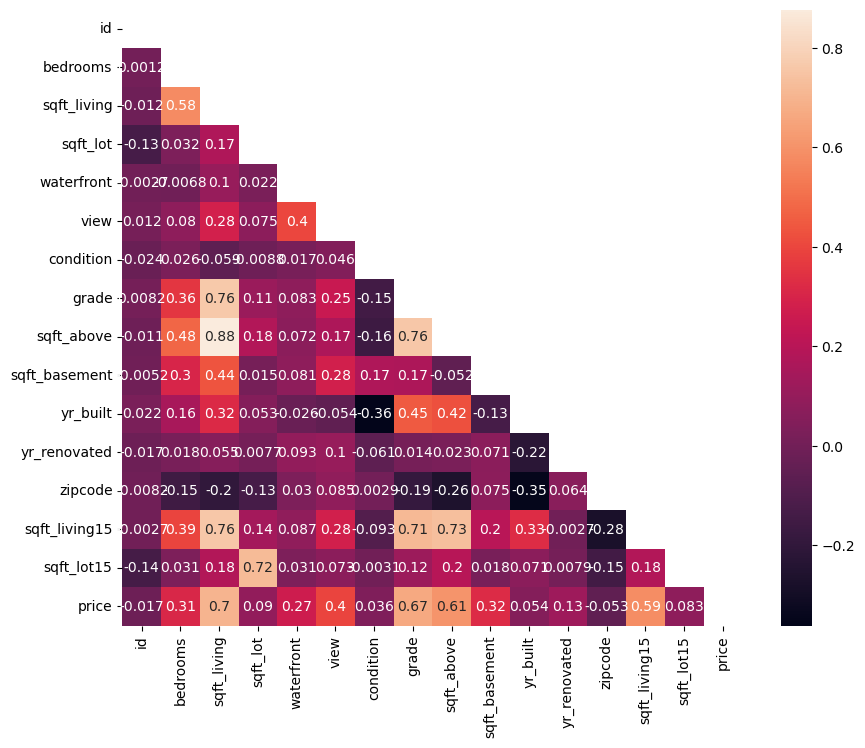

In [24]:
# 5.3.2 Correlation amongst features - Multicolinearity
# As we don't have any features with correlation higher than 0.9, so we will keep all of the features.

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)

In [25]:
# 6. Encoding Categorical Variables

data3 = data2.copy()

data3= pd.get_dummies(data3, columns=[ 'bathrooms', 'floors' ], drop_first=True)
data3

,id,date,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,...,"bathrooms_6,5","bathrooms_6,75","bathrooms_7,5","bathrooms_7,75",bathrooms_8,"floors_1,5",floors_2,"floors_2,5",floors_3,"floors_3,5"
0,7129300520,13/10/2014,3,1180,5650,0,0,3,7,1180,...,False,False,False,False,False,False,False,False,False,False
1,6414100192,09/12/2014,3,2570,7242,0,0,3,7,2170,...,False,False,False,False,False,False,True,False,False,False
2,5631500400,25/02/2015,2,770,10000,0,0,3,6,770,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,09/12/2014,4,1960,5000,0,0,5,7,1050,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,18/02/2015,3,1680,8080,0,0,3,8,1680,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,21/05/2014,3,1530,1131,0,0,3,8,1530,...,False,False,False,False,False,False,False,False,True,False
21593,6600060120,23/02/2015,4,2310,5813,0,0,3,8,2310,...,False,False,False,False,False,False,True,False,False,False
21594,1523300141,23/06/2014,2,1020,1350,0,0,3,7,1020,...,False,False,False,False,False,False,True,False,False,False
21595,291310100,16/01/2015,3,1600,2388,0,0,3,8,1600,...,False,False,False,False,False,False,True,False,False,False


In [27]:
# 7. Splitting into train set and test set

x = data3.drop(['price', 'lat', 'long', 'date'], axis=1)
y = data3['price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,...,"bathrooms_6,5","bathrooms_6,75","bathrooms_7,5","bathrooms_7,75",bathrooms_8,"floors_1,5",floors_2,"floors_2,5",floors_3,"floors_3,5"
753,8682300890,2,2380,6600,0,0,3,8,2380,0,...,False,False,False,False,False,False,False,False,False,False
1418,8073000550,4,3190,17186,1,4,3,10,3190,0,...,False,False,False,False,False,False,True,False,False,False
8178,7212680850,3,1730,6930,0,0,3,8,1730,0,...,False,False,False,False,False,False,True,False,False,False
2254,8880600070,4,1870,8750,0,2,3,7,1870,0,...,False,False,False,False,False,False,False,False,False,False
4063,7226500100,8,2850,12714,0,0,3,7,2850,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,3,2230,5800,0,0,3,7,2230,0,...,False,False,False,False,False,False,True,False,False,False
21575,4140940150,4,2770,3852,0,0,3,8,2770,0,...,False,False,False,False,False,False,True,False,False,False
5390,8658300480,4,1530,9000,0,0,4,6,1530,0,...,False,False,False,False,False,False,False,False,False,False
860,1723049033,1,380,15000,0,0,3,5,380,0,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# 8. Normalization
scaler = StandardScaler()

scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
# 9. Training the Model

lm = LinearRegression()

lm.fit(x_train_scaled, y_train)

predictions = lm.predict(x_test_scaled)


In [30]:
# 10. Model Validation

r2 = round(r2_score(y_test, predictions), 2)
print(f'Rounded R^2 score: {r2}')


rmse = round(mean_squared_error(y_test, predictions, squared=False), 2)
print(f'Rounded RMSE: {rmse}')


mae = round(mean_absolute_error(y_test, predictions), 2)
print(f'Rounded MAE: {mae}')

Rounded R^2 score: 0.61
Rounded RMSE: 226126.49
Rounded MAE: 137581.26


<Axes: xlabel='price'>

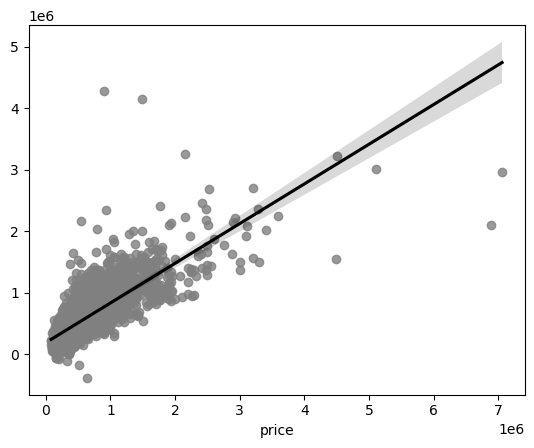

In [31]:
# 11. Improving the model
# getting the regression plot from the predictions vs the true values:


sns.regplot(x=y_test, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "grey"})

In [ ]:
# - The scatter points appear to follow the general trend of the regression line, 
# suggesting that the model's predictions are reasonably aligned with the actual values.

# -  there are points that deviate significantly from the line, especially at higher prices. 
# These deviations indicate areas where the model's predictions are less accurate.

# - The scatter points are more densely packed at lower price values and more spread out at higher price values. 
# This could indicate that the model performs better at predicting lower prices but struggles with higher prices,
# which might be outliers or more complex to predict.

# - The points that are far away from the regression line might be considered outliers, 
# where the model's predictions do not align well with the actual values.



In [32]:
# 11.1 Log scaling 
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)



y_train_scaled

753      13.458550
1418     14.346139
8178     12.460715
2254     12.409013
4063     12.829334
           ...    
11964    12.994530
21575    13.256894
5390     12.610871
860      12.409013
15795    13.208541
Name: price, Length: 15117, dtype: float64

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_20766/37823320.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, bins=10)


<Axes: xlabel='price', ylabel='Density'>

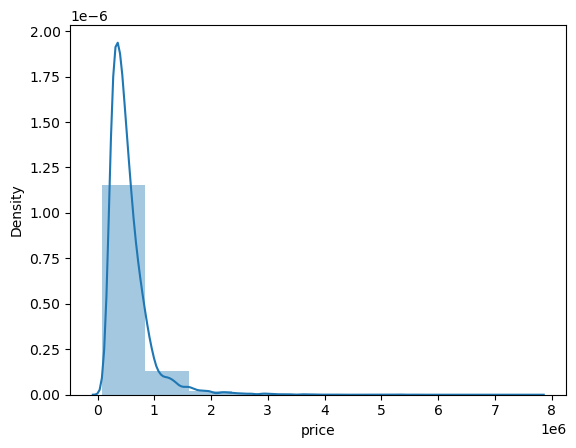

In [20]:
sns.distplot(y_train, bins=10)

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_20766/543638580.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_scaled, bins=10)


<Axes: xlabel='price', ylabel='Density'>

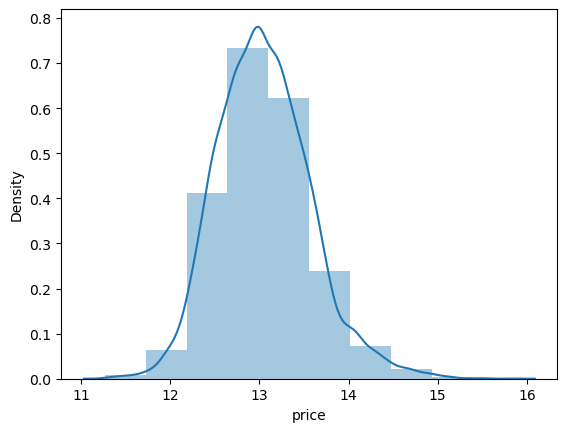

In [56]:
sns.distplot(y_train_scaled, bins=10)

In [35]:
lm = LinearRegression()
lm.fit(x_train_scaled, y_train_scaled)

predictions = lm.predict(x_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2))

R2_score: 0.64


<Axes: xlabel='price'>

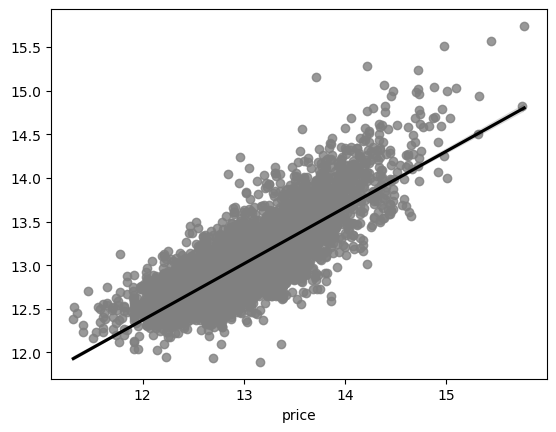

In [39]:

sns.regplot(x=y_test_scaled, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "grey"})



In [38]:
# 11.2 Evaluate using cross-validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=42)


cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')

print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean()}")    # All five folds have R² scores around 0.80 suggests that the model is consistent and likely generalizes well to new, unseen data.


Cross-validated R² scores: [0.8226841  0.80675186 0.81956577 0.80668174 0.80787614]
Mean R² score: 0.8127119236798686
